In [6]:
#This is my first Neural network
#I am going to build a 2-class classification neural network with singlw hidden layer

#importing required packages

import numpy #for scientifc computing
import sklearn #for data mining and data analysis
import matplotlib.pyplot as plt #for plotting graphs
from testCases import *
import sklearn.datasets
import sklearn.linear_model
from planar_utils import * #plot_decision_boundary, sigmoid, load_planar_dataset, load_extra datasets

%matplotlib inline

np.random.seed(1)

In [8]:
X,Y= load_planar_dataset()

[[ 1.20444229e+00  1.58709904e-01  9.52471960e-02  3.49178475e-01
   6.94150378e-01  1.62065038e+00  1.53856225e+00  3.63085641e-02
   4.74591109e-01  1.65695828e-01  1.66446249e+00  8.40285720e-01
   2.61695163e-01  2.31614896e-01  1.58013020e+00  6.35509950e-03
   6.80610419e-01  1.21400432e-01  1.13281261e+00  1.61505892e+00
   1.66454441e-01  1.72438241e+00  1.88667246e+00  1.72327227e+00
   1.54661332e+00  9.84590400e-01  1.45313345e+00  7.49043388e-01
   1.45048341e+00  1.64287865e+00  1.28141487e+00  1.59574104e+00
   1.46298294e+00  1.46629048e+00  1.54348961e+00  1.57013416e+00
   1.22995404e+00  1.31142345e+00 -1.99364553e+00  3.94564752e-01
   1.51715449e+00  1.69169139e+00  1.74186686e+00 -2.91373382e+00
   7.52150898e-01  1.68537303e+00  3.71160238e-01 -3.73033884e+00
   3.52484080e-01 -1.48694206e+00 -7.45290416e-01  5.63807442e-01
   1.27093179e+00  5.35133607e-01 -1.71330375e-01 -2.50197293e+00
  -2.63275448e+00 -3.15561550e+00 -2.11022490e+00 -3.51303563e+00
  -3.52018

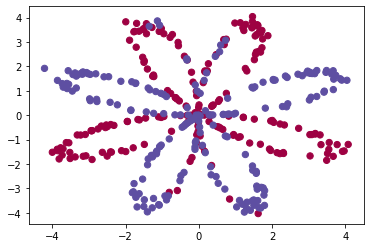

In [31]:
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)
#X[0, :] means fetch the 0th row and all its corresponding values in the columns
#X has all the points where it has red dots and blue dots in a list os list format, where the first list describes the red dots and the second list describes the blue dots
#print (X)
#print (Y)
#print(len(X[1]))
#Y has all the labels red:0 and blue:1
#c is a one dimensional vector, so we use Y.ravel to reshape the list. Alternatively we can use Y.reshape(400,)

In [28]:
shape_X=X.shape
shape_Y=Y.shape
m=X.shape[1]
print("This is the shape of X:"+str(shape_X))
print("This is the shape of Y:"+str(shape_Y))
print("There are m = %d training samples!"% (m))

This is the shape of X:(2, 400)
This is the shape of Y:(1, 400)
There are m = 400 training samples!


In [35]:
clf=sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T.ravel())

C:\Users\Solaiappan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

Accuracy of logistic regression: 47% (percentage of correctly labelled datapoints)


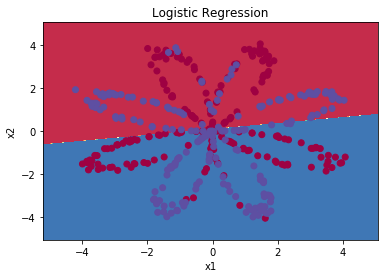

In [44]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y.ravel())
plt.title("Logistic Regression")

LR_predictions=clf.predict(X.T)
print("Accuracy of logistic regression: %d"%float((np.dot(Y,LR_predictions)+np.dot(1-Y,1-LR_predictions))/float(Y.size)*100)+"%"+ " (percentage of correctly labelled datapoints)")

In [45]:
def layer_sizes(X,Y):
    n_x=X.shape[0]
    n_h=4
    n_y=Y.shape[0]
    return (n_x,n_h,n_y)

In [48]:
X_assess,Y_assess = layer_sizes_test_case()
(n_x,n_h,n_y)=layer_sizes(X_assess,Y_assess)
print(X_assess)
print(Y_assess)
print("The size of the input layer is: n_x = "+ str(n_x))
print("The size of the hidden layer is: n_h = "+ str(n_h))
print("The size of the output layer is: n_y = "+ str(n_y))

[[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069   0.3190391 ]
 [-0.24937038  1.46210794 -2.06014071]
 [-0.3224172  -0.38405435  1.13376944]]
[[-1.09989127 -0.17242821 -0.87785842]
 [ 0.04221375  0.58281521 -1.10061918]]
The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [54]:
def initialize_parameters(n_x,n_h,n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [55]:
n_x,n_h,n_y = initialize_parameters_test_case()
parameters=initialize_parameters(n_x,n_h,n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [56]:
def forward_propagation(X, parameters):
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [58]:
X_assess, parameters = forward_propagation_test_case()
A2,cache = forward_propagation(X_assess, parameters)

print(np.mean(cache["Z1"]), np.mean(cache["A1"]),np.mean(cache["Z2"]),np.mean(cache["A2"]))

-0.0004997557777419902 -0.000496963353231779 0.00043818745095914653 0.500109546852431


In [61]:
def compute_cost(A2, Y, parameters):
    m=Y.shape[1]
    logprobs=np.multiply(np.log(A2),Y) + ((1-Y) * np.log(1-A2))
    cost=-(1/m) * np.sum(logprobs)
    
    cost=np.squeeze(cost)
    return cost

In [62]:
A2, Y_assess, parameters = compute_cost_test_case()
print("cost =" + str(compute_cost(A2, Y_assess, parameters)))

cost =0.6929198937761265


In [65]:
def backward_propagation(parameters, cache, X, Y):
    m=X.shape[1]
    W1=parameters["W1"]
    W2=parameters["W2"]
    A1=cache["A1"]
    A2=cache["A2"]
    
    dz2=A2-Y
    dw2=(1/m)*np.dot(dz2, A1.T)
    db2=(1/m)*np.sum(dz2,axis=1,keepdims=True)
    
    dz1=np.dot(W2.T,dz2)*(1-np.power(A1,2))
    dw1=(1/m)*np.dot(dz1,X.T)
    db1=(1/m)*np.sum(dz1,axis=1,keepdims=True)
    
    grads = {"dW1": dw1,
             "db1": db1,
             "dW2": dw2,
             "db2": db2}
    return grads

In [66]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


In [67]:
def update_parameters(parameters, grads, learning_rate=1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters 

In [68]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [71]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    np.random.seed(3)
    n_x=layer_sizes(X,Y)[0]
    n_y=layer_sizes(X,Y)[2]
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    for i in range(0, num_iterations):
        A2,cache=forward_propagation(X, parameters)
        cost=compute_cost(A2, Y, parameters)
        grads=backward_propagation(parameters, cache, X, Y)
        parameters=update_parameters(parameters, grads)
        if print_cost and i % 1000 == 0:
            print("Cost after iteration %i: %f"%(i,cost))
    return parameters

In [73]:
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

C:\Users\Solaiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


W1 = [[-4.18494482  5.33220319]
 [-7.52989354  1.24306197]
 [-4.19295428  5.32631786]
 [ 7.52983748 -1.24309404]]
b1 = [[ 2.32926815]
 [ 3.7945905 ]
 [ 2.33002544]
 [-3.79468791]]
W2 = [[-6033.83672179 -6008.12981272 -6033.10095329  6008.06636901]]
b2 = [[-52.66607704]]


In [74]:
def predict(parameters, X):
    A2, cache=forward_propagation(X,parameters)
    predictions=(A2>0.5)
    
    return predictions

In [75]:
parameters, X_assess = predict_test_case()
predictions = predict(parameters, X_assess)
print("prediction mean = "+str(np.mean(predictions)))

prediction mean = 0.6666666666666666


Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219504
Cost after iteration 9000: 0.218571


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

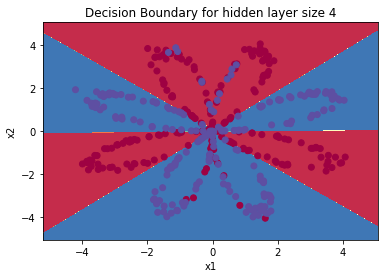

In [77]:
parameters = nn_model(X,Y,n_h=4,num_iterations=10000,print_cost=True)
plot_decision_boundary(lambda x: predict(parameters, x.T),X,Y.ravel())
plt.title("Decision Boundary for hidden layer size "+ str(4))

In [79]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.0 %
Accuracy for 3 hidden units: 91.5 %
Accuracy for 4 hidden units: 91.0 %
Accuracy for 5 hidden units: 91.0 %
Accuracy for 20 hidden units: 94.0 %


C:\Users\Solaiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Solaiappan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy for 50 hidden units: 95.75 %


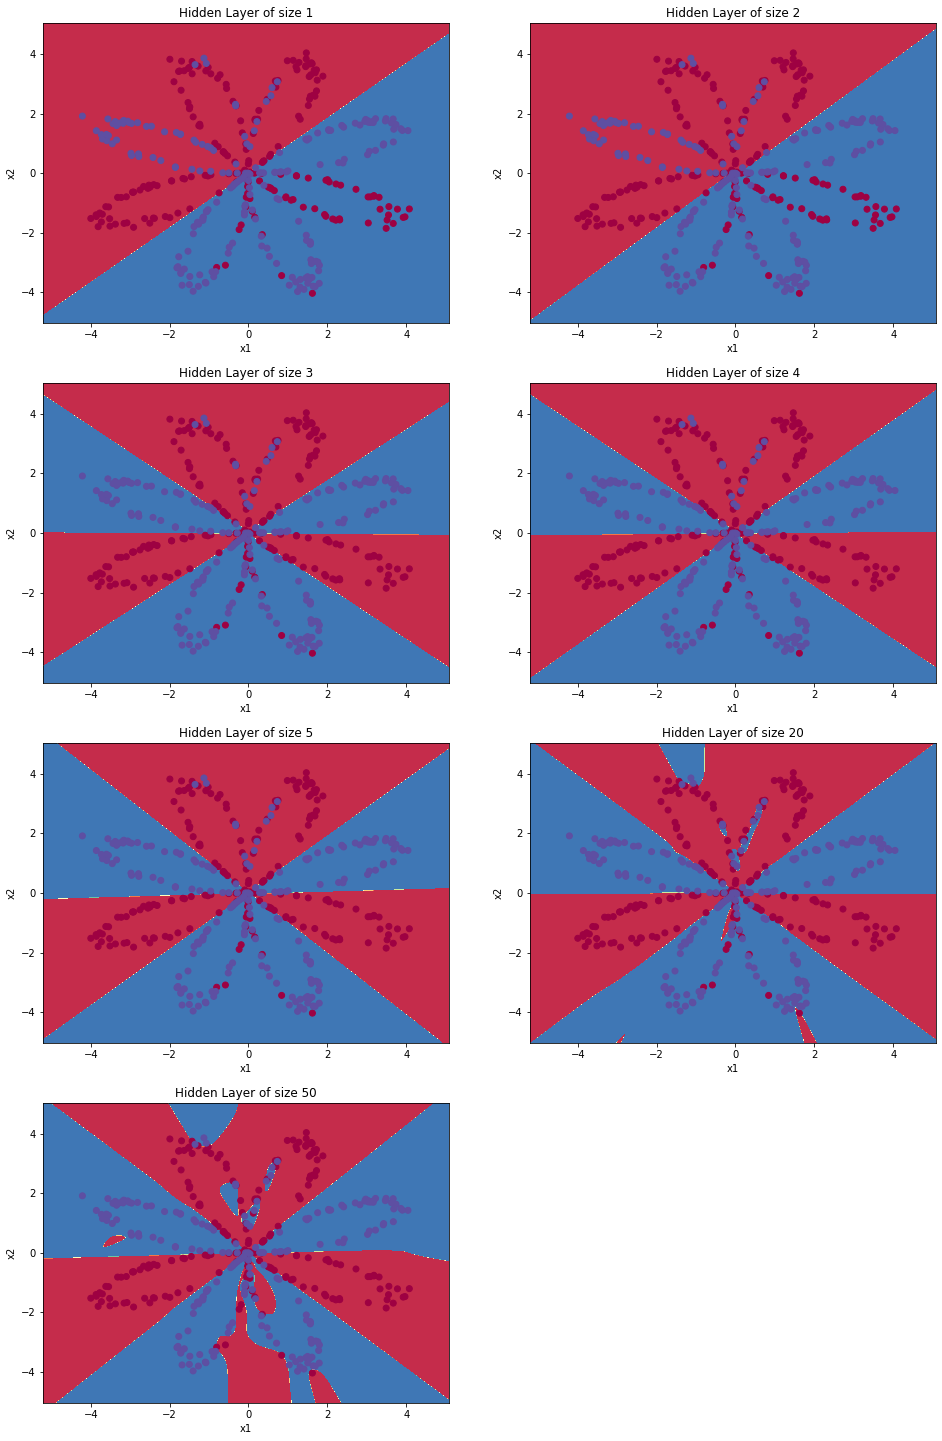

In [81]:
plt.figure(figsize=(16,32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 50000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.ravel())
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

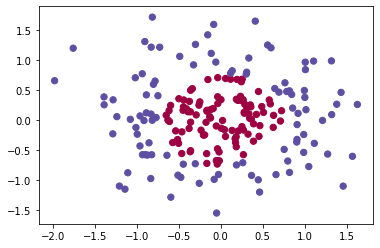

In [86]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "gaussian_quantiles"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);